# Projeto AceleraDev Data Science

[**Marina Borges**](https://github.com/inaborges)  
Projeto Prático para finalização do curso  
Codenation  
*AceleraDev Data Science 2020*

### Objetivo
O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes (Portfólio).

<img src="lead.jpg" width="500"/>

### Contextualização
Algumas empresas gostariam de saber quem são as demais empresas em um determinado mercado (população) que tem maior probabilidade se tornarem seus próximos clientes. Ou seja, a sua solução deve encontrar no mercado quem são os leads mais aderentes dado as características dos clientes presentes no portfólio do usuário.

Além disso, sua solução deve ser agnóstica ao usuário. Qualquer usuário com uma lista de clientes que queira explorar esse mercado pode extrair valor do serviço.

Para o desafio, deverão ser consideradas as seguintes bases:

**Mercado:** Base com informações sobre as empresas do Mercado a ser considerado. Portfolio 1: Ids dos clientes da empresa 1 Portfolio 2: Ids dos clientes da empresa 2 Portfolio 3: Ids dos clientes da empresa 3

**Obs:** todas as empresas(ids) dos portfolios estão contidos no Mercado(base de população).

### Requisitos técnicos obrigatórios

* Utilizar técnicas de data science e machine learning para desenvolver o projeto;
* Apresentar o desenvolvimento e outputs do modelo em um Jupyter Notebook ou outra tecnologia de apresentação de Output de modelos de Machine Learning;
* A análise deve considerar os seguintes pontos: 
    1. [X] Análise exploratória dos dados
    2. [X] Tratamento dos dados 
    3. [ ] Avaliação de algoritmos 
    4. [ ] Treinamento do modelo 
    5. [ ] Avaliação de performance do modelo
    6. [ ] Visualização dos resultados  
    
    
* Para a apresentação do projeto, o tempo entre o treinamento do modelo e o output deve ser menor que 20 min.

# 1

## Análise exploratória dos dados

#### Importando as bibliotecas para realizar a análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np

#### Importando o arquivo .csv

In [2]:
estaticos_market = pd.read_csv('estaticos_market.csv')

#### Explorando o dataset

In [3]:
estaticos_market.columns.tolist()

['Unnamed: 0',
 'id',
 'fl_matriz',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_empresa_anos',
 'idade_emp_cat',
 'fl_me',
 'fl_sa',
 'fl_epp',
 'fl_mei',
 'fl_ltda',
 'dt_situacao',
 'fl_st_especial',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'vl_total_tancagem',
 'vl_total_veiculos_antt',
 'vl_total_veiculos_leves',
 'vl_total_veiculos_pesados',
 'fl_optante_simples',
 'qt_art',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'vl_total_tancagem_grupo',
 'vl_total_veiculos_antt_grupo',
 'vl_potenc_cons_oleo_gas',
 'fl_optante_simei',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'de_indicador_telefone',
 'fl_simples_irregular',
 'vl_frota',
 'empsetorcensitariofaixarendapopulacao',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj

In [4]:
print("-----------Information-----------")
print(estaticos_market.info())

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float64(144), int64(2), object(27)
memory usage: 614.1+ MB
None


Utilizando ```.columns()``` e ```.info()``` podemos ver que o dataset tem 182 colunas e 462298 linhas.
Na etapa de limpeza dos dados será possível decidir quais dados manter para a criação do modelo de machine learning.

In [5]:
print("-----------Data Types-----------")
print(estaticos_market.dtypes)

-----------Data Types-----------
Unnamed: 0                   int64
id                          object
fl_matriz                     bool
de_natureza_juridica        object
sg_uf                       object
                            ...   
qt_funcionarios_24meses    float64
tx_crescimento_12meses     float64
tx_crescimento_24meses     float64
tx_rotatividade            float64
qt_filiais                   int64
Length: 182, dtype: object


Verificando a existência de valores nulos:

In [6]:
print("----------Missing value-----------")
(estaticos_market.isna().values.any())

----------Missing value-----------


True

# 2
## Tratamento dos dados

Verificando quantas colunas tem o percentual de valores nulos maior do que 60%:

In [7]:
((estaticos_market.isna().sum()/estaticos_market.shape[0]*100) > 60.0).value_counts().sort_index()

False     52
True     130
dtype: int64

Criando uma lista com essas colunas para aplicar o método ```.drop```

In [8]:
null = (estaticos_market.isna().sum()/estaticos_market.shape[0]*100) > 60.0 
null = null[null.isin([True])]
null_list = list(null.index)
len(null_list)

130

Das 182 colunas, 130 tem mais de 60% dos valores nulos, portanto elas podem não ser relevantes para a análise e eu optarei por eliminar essas colunas.

In [9]:
estaticos_market.drop(columns=null_list, inplace=True)

In [10]:
estaticos_market

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,44.000000,47.0,41.0,2.0,2.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,27.000000,27.0,27.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,32.000000,32.0,32.0,NaN,1.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,36.000000,36.0,36.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,3.254795,1 a 5,...,31.000000,31.0,31.0,1.0,1.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
462294,462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,8.953425,5 a 10,...,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462295,462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,True,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE SAUDE,SERVIÇO,20.745205,> 20,...,74.000000,74.0,74.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462296,462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,True,SOCIEDADE EMPRESARIA LIMITADA,RO,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,1.909589,1 a 5,...,31.666667,39.0,25.0,3.0,2.0,"DE R$ 360.000,01 A R$ 1.500.000,00","DE R$ 360.000,01 A R$ 1.500.000,00",432734.4,432734.4,0


In [11]:
estaticos_market.shape

(462298, 52)

Nosso novo dataset tem 52 colunas, vou fazer uma análise mais manual dessas colunas para decidir qual delas irei manter na análise.

In [12]:
estaticos_market.columns.tolist()

['Unnamed: 0',
 'id',
 'fl_matriz',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_empresa_anos',
 'idade_emp_cat',
 'fl_me',
 'fl_sa',
 'fl_epp',
 'fl_mei',
 'fl_ltda',
 'dt_situacao',
 'fl_st_especial',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'fl_optante_simples',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'fl_optante_simei',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'fl_simples_irregular',
 'empsetorcensitariofaixarendapopulacao',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'idade_media_socios',
 'idade_maxima_socios',
 'idade_minima_socios',
 'qt_socios_st_regular',
 'qt_socios_masculino',
 'de_faixa_faturamento_estimado',
 'de_faixa_faturamento_estimado_grupo',
 'vl_faturamento_estimado_aux',
 'vl_faturamento_

Vou analisar algumas colunas para entender melhor os valores.

In [13]:
estaticos_market.iloc[:,0:6]

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS
...,...,...,...,...,...,...
462293,462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS
462294,462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS
462295,462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,True,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS
462296,462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,True,SOCIEDADE EMPRESARIA LIMITADA,RO,ENTIDADES EMPRESARIAIS


In [14]:
estaticos_market['fl_matriz'].value_counts()

True     433232
False     29066
Name: fl_matriz, dtype: int64

In [15]:
estaticos_market.iloc[:,6:12]

,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa
0,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False
1,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False
2,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False
3,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False
4,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False
...,...,...,...,...,...,...
462293,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,3.254795,1 a 5,False,False
462294,SERVICOS ADMINISTRATIVOS,SERVIÇO,8.953425,5 a 10,False,False
462295,SERVICOS DE SAUDE,SERVIÇO,20.745205,> 20,False,False
462296,COMERCIO VAREJISTA,COMERCIO,1.909589,1 a 5,False,False


In [16]:
estaticos_market['fl_me'].value_counts()

False    461083
True       1215
Name: fl_me, dtype: int64

In [17]:
estaticos_market['fl_sa'].value_counts()

False    453866
True       8432
Name: fl_sa, dtype: int64

In [18]:
estaticos_market.iloc[:,12:18]

,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email
0,False,False,False,2005-03-25,False,True
1,False,True,False,2017-05-12,False,True
2,False,True,False,2011-09-26,False,False
3,False,False,False,2012-04-25,False,True
4,False,False,False,2015-08-17,False,True
...,...,...,...,...,...,...
462293,False,True,False,2015-07-28,False,True
462294,False,False,False,2009-11-16,False,False
462295,False,False,False,2005-11-03,False,False
462296,False,False,False,2016-11-30,False,True


In [19]:
estaticos_market.iloc[:,18:25]

,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo
0,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False
1,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False
2,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False
3,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False
4,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False
...,...,...,...,...,...,...,...
462293,True,NAO,COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E...,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False
462294,False,SIM,SELECAO AGENCIAMENTO E LOCACAO DE MAO DE OBRA,ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEME...,False,False,False
462295,False,SIM,ATIVIDADES DE ATENCAO A SAUDE HUMANA,SAUDE HUMANA E SERVICOS SOCIAIS,False,False,False
462296,False,NAO,COMERCIO VAREJISTA,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,False,False,False


In [20]:
estaticos_market.iloc[:,25:30]

,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz
0,True,0.0,0.0,False,RN
1,NaN,0.0,0.0,NaN,PI
2,True,0.0,0.0,True,AM
3,True,0.0,0.0,False,AM
4,True,0.0,0.0,False,RN
...,...,...,...,...,...
462293,True,0.0,0.0,True,RN
462294,False,0.0,0.0,False,PI
462295,False,0.0,0.0,False,MA
462296,False,0.0,0.0,False,RO


In [21]:
estaticos_market.iloc[:,30:36]

,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao
0,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,NaN
1,CINZA,ATE 1 ANO,9.0,BAIXA,False,468.93
2,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,713.50
3,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,475.73
4,VERDE,ACIMA DE 1 ANO,27.0,ALTA,False,2874.04
...,...,...,...,...,...,...
462293,VERDE,ACIMA DE 1 ANO,22.0,ALTA,False,585.63
462294,LARANJA,ACIMA DE 1 ANO,23.0,MUITO BAIXA,False,2429.89
462295,AMARELO,ACIMA DE 1 ANO,23.0,MEDIA,False,3150.81
462296,VERDE,ACIMA DE 1 ANO,20.0,ALTA,False,2752.49


In [22]:
estaticos_market.iloc[:,36:42]

,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj
0,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0
1,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0
2,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0
3,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0
4,LESTE POTIGUAR,NATAL,True,1.0,1.0,0.0
...,...,...,...,...,...,...
462293,AGRESTE POTIGUAR,BORBOREMA POTIGUAR,False,1.0,1.0,0.0
462294,CENTRO NORTE PIAUIENSE,TERESINA,True,NaN,NaN,NaN
462295,NORTE MARANHENSE,AGLOMERACAO URBANA DE SAO LUIS,True,1.0,1.0,0.0
462296,NaN,NaN,False,5.0,5.0,0.0


In [23]:
estaticos_market.iloc[:,42:48]

,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,de_faixa_faturamento_estimado
0,44.000000,47.0,41.0,2.0,2.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00"
1,27.000000,27.0,27.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00"
2,32.000000,32.0,32.0,NaN,1.0,"ATE R$ 81.000,00"
3,36.000000,36.0,36.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00"
4,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00"
...,...,...,...,...,...,...
462293,31.000000,31.0,31.0,1.0,1.0,"ATE R$ 81.000,00"
462294,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00"
462295,74.000000,74.0,74.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00"
462296,31.666667,39.0,25.0,3.0,2.0,"DE R$ 360.000,01 A R$ 1.500.000,00"


In [24]:
estaticos_market.iloc[:,48:]

,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,"DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,"ATE R$ 81.000,00",50000.0,50000.0,0
3,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
...,...,...,...,...
462293,"ATE R$ 81.000,00",50000.0,50000.0,0
462294,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462295,"DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462296,"DE R$ 360.000,01 A R$ 1.500.000,00",432734.4,432734.4,0


Após a análise de coluna por coluna, decidi que não são relevantes as seguintes variáveis:

In [25]:
features_to_drop = ['Unnamed: 0','fl_me','fl_sa','fl_epp','fl_mei','fl_ltda','dt_situacao',
                    'fl_st_especial','fl_email','fl_telefone', 'fl_rm', 'sg_uf_matriz', 'empsetorcensitariofaixarendapopulacao']

In [26]:
estaticos_market.drop(columns=features_to_drop, inplace=True)

In [27]:
estaticos_market.shape

(462298, 39)

In [28]:
estaticos_market

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,nm_divisao,...,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,CONSTRUCAO DE EDIFICIOS,...,44.000000,47.0,41.0,2.0,2.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,ALIMENTACAO,...,27.000000,27.0,27.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,TRANSPORTE TERRESTRE,...,32.000000,32.0,32.0,NaN,1.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,...,36.000000,36.0,36.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,...,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,3.254795,1 a 5,COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E...,...,31.000000,31.0,31.0,1.0,1.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,8.953425,5 a 10,SELECAO AGENCIAMENTO E LOCACAO DE MAO DE OBRA,...,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,True,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE SAUDE,SERVIÇO,20.745205,> 20,ATIVIDADES DE ATENCAO A SAUDE HUMANA,...,74.000000,74.0,74.0,1.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,True,SOCIEDADE EMPRESARIA LIMITADA,RO,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,1.909589,1 a 5,COMERCIO VAREJISTA,...,31.666667,39.0,25.0,3.0,2.0,"DE R$ 360.000,01 A R$ 1.500.000,00","DE R$ 360.000,01 A R$ 1.500.000,00",432734.4,432734.4,0


Agora vamos tratar os valores nulos.

In [29]:
estaticos_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   462298 non-null  object 
 1   fl_matriz                            462298 non-null  bool   
 2   de_natureza_juridica                 462298 non-null  object 
 3   sg_uf                                462298 non-null  object 
 4   natureza_juridica_macro              462298 non-null  object 
 5   de_ramo                              462298 non-null  object 
 6   setor                                460371 non-null  object 
 7   idade_empresa_anos                   462298 non-null  float64
 8   idade_emp_cat                        462298 non-null  object 
 9   nm_divisao                           460371 non-null  object 
 10  nm_segmento                          460371 non-null  object 
 11  fl_spa       

Para a variável setor, temos os valores:

In [30]:
estaticos_market['setor'].value_counts(normalize=True)

COMERCIO            0.458813
SERVIÇO             0.411937
INDUSTRIA           0.067105
CONSTRUÇÃO CIVIL    0.055093
AGROPECUARIA        0.007053
Name: setor, dtype: float64

Vou preencher os valores nulos com o valor 'NÃO INFORMADO'

In [31]:
estaticos_market['setor'].fillna('NAO INFORMADO', inplace = True)

Conhecendo os valores únicos da variável ```nm_divisao```:

In [32]:
pd.set_option('display.max_rows', None)
estaticos_market['nm_divisao'].value_counts(normalize=True)

COMERCIO VAREJISTA                                                                                                          0.374489
ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS                                                                                     0.082507
ALIMENTACAO                                                                                                                 0.059821
COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS                                                                 0.048561
COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTORES E MOTOCICLETAS                                                             0.035762
OUTRAS ATIVIDADES DE SERVICOS PESSOAIS                                                                                      0.034483
SERVICOS ESPECIALIZADOS PARA CONSTRUCAO                                                                                     0.031042
TRANSPORTE TERRESTRE                                                 

In [33]:
estaticos_market['nm_divisao'].fillna('NAO INFORMADO', inplace = True)

In [34]:
estaticos_market['nm_segmento'].value_counts(normalize=True)

COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS           0.458813
OUTRAS ATIVIDADES DE SERVICOS                                        0.129376
INDUSTRIAS DE TRANSFORMACAO                                          0.069440
ALOJAMENTO E ALIMENTACAO                                             0.065556
CONSTRUCAO                                                           0.055093
ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES                 0.046324
ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS                      0.037733
TRANSPORTE ARMAZENAGEM E CORREIO                                     0.033636
EDUCACAO                                                             0.024569
SAUDE HUMANA E SERVICOS SOCIAIS                                      0.022024
ARTES CULTURA ESPORTE E RECREACAO                                    0.011953
INFORMACAO E COMUNICACAO                                             0.011893
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS       

In [35]:
estaticos_market['nm_segmento'].fillna('NAO INFORMADO', inplace = True)

In [36]:
estaticos_market['fl_spa'].value_counts(normalize=True)

False    0.999392
True     0.000608
Name: fl_spa, dtype: float64

Nesse caso, como a maior parte dos valores é ```False``` vou preencher os valores nulos com ```False```.

In [37]:
estaticos_market['fl_spa'].fillna(False, inplace = True)

In [38]:
estaticos_market['fl_spa'].value_counts(normalize=True)

False    0.999394
True     0.000606
Name: fl_spa, dtype: float64

In [39]:
estaticos_market['fl_antt'].value_counts(normalize=True)

False    0.992884
True     0.007116
Name: fl_antt, dtype: float64

In [40]:
estaticos_market['fl_antt'].fillna(False, inplace = True)

In [41]:
estaticos_market['fl_veiculo'].value_counts(normalize=True)

False    0.933349
True     0.066651
Name: fl_veiculo, dtype: float64

In [42]:
estaticos_market['fl_veiculo'].fillna(False, inplace = True)

In [43]:
estaticos_market['fl_optante_simples'].value_counts(normalize=True)

True     0.525882
False    0.474118
Name: fl_optante_simples, dtype: float64

No caso da variável ```fl_optante_simples```, nós temos um equilibrio entre ```true``` and ```false```.      

Utilizando o método ```ffill``` eu consigo manter a proporção de ```true``` e ```false```.

In [44]:
estaticos_market['fl_optante_simples'].fillna(method='ffill', inplace = True)

In [45]:
estaticos_market['fl_optante_simples'].value_counts(normalize=True)

True     0.525209
False    0.474791
Name: fl_optante_simples, dtype: float64

In [46]:
estaticos_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   462298 non-null  object 
 1   fl_matriz                            462298 non-null  bool   
 2   de_natureza_juridica                 462298 non-null  object 
 3   sg_uf                                462298 non-null  object 
 4   natureza_juridica_macro              462298 non-null  object 
 5   de_ramo                              462298 non-null  object 
 6   setor                                462298 non-null  object 
 7   idade_empresa_anos                   462298 non-null  float64
 8   idade_emp_cat                        462298 non-null  object 
 9   nm_divisao                           462298 non-null  object 
 10  nm_segmento                          462298 non-null  object 
 11  fl_spa       

In [47]:
estaticos_market['vl_total_veiculos_pesados_grupo'].value_counts(normalize=True)

0.0       0.958705
1.0       0.014738
2.0       0.005615
3.0       0.002826
4.0       0.001796
5.0       0.001418
7.0       0.001156
6.0       0.001058
1177.0    0.000810
95.0      0.000615
8.0       0.000582
2347.0    0.000576
9.0       0.000567
39.0      0.000441
17.0      0.000417
10.0      0.000400
13.0      0.000350
11.0      0.000326
28.0      0.000311
12.0      0.000280
15.0      0.000280
40.0      0.000250
21.0      0.000228
16.0      0.000226
129.0     0.000211
382.0     0.000204
14.0      0.000187
26.0      0.000172
80.0      0.000172
19.0      0.000165
27.0      0.000161
89.0      0.000119
22.0      0.000117
20.0      0.000117
71.0      0.000115
52.0      0.000106
33.0      0.000102
18.0      0.000102
45.0      0.000087
23.0      0.000085
25.0      0.000085
29.0      0.000080
38.0      0.000080
350.0     0.000080
34.0      0.000080
46.0      0.000078
37.0      0.000074
146.0     0.000070
31.0      0.000067
30.0      0.000065
86.0      0.000065
69.0      0.000063
122.0     0.

Nesse caso, 95% dos valores são 0, então vou preencher os valores nulos com 0.

In [48]:
estaticos_market['vl_total_veiculos_pesados_grupo'].fillna(0, inplace = True)

In [49]:
estaticos_market['vl_total_veiculos_leves_grupo'].value_counts(normalize=True)

0.0         0.921387
1.0         0.034185
2.0         0.011365
3.0         0.005669
4.0         0.003408
5.0         0.002387
6.0         0.001696
7.0         0.001342
8.0         0.001112
10.0        0.000886
9.0         0.000834
35064.0     0.000810
11.0        0.000734
6751.0      0.000610
390.0       0.000586
11256.0     0.000576
13.0        0.000519
15.0        0.000508
12.0        0.000450
26.0        0.000404
25.0        0.000352
16.0        0.000337
14.0        0.000313
21.0        0.000282
22.0        0.000243
20.0        0.000237
27.0        0.000232
399.0       0.000230
19.0        0.000224
55.0        0.000224
17.0        0.000211
124.0       0.000211
604.0       0.000209
199.0       0.000209
67.0        0.000193
18.0        0.000193
96.0        0.000172
231.0       0.000169
24.0        0.000163
147.0       0.000163
34.0        0.000141
23.0        0.000141
71.0        0.000139
28.0        0.000137
29.0        0.000130
39.0        0.000130
63.0        0.000124
479.0       0

In [50]:
# Mesmo caso anterior, mais de 90% dos valores são 0, então preenchi os valores nulos com 0.
estaticos_market['vl_total_veiculos_leves_grupo'].fillna(0, inplace = True)

In [51]:
estaticos_market['fl_optante_simei'].value_counts(normalize=True)

False    0.752256
True     0.247744
Name: fl_optante_simei, dtype: float64

In [52]:
estaticos_market['fl_optante_simei'].fillna(False, inplace = True)

In [53]:
estaticos_market['de_saude_tributaria'].value_counts(normalize=True)

VERDE       0.325022
AZUL        0.235179
AMARELO     0.203477
CINZA       0.143076
LARANJA     0.080716
VERMELHO    0.012531
Name: de_saude_tributaria, dtype: float64

In [54]:
# Nesse caso vou preencher com a categoria predominante no dataset, a cor VERDE:
estaticos_market['de_saude_tributaria'].fillna('VERDE', inplace = True)

In [55]:
estaticos_market['de_saude_tributaria'].value_counts(normalize=True)

VERDE       0.346705
AZUL        0.227624
AMARELO     0.196940
CINZA       0.138480
LARANJA     0.078123
VERMELHO    0.012129
Name: de_saude_tributaria, dtype: float64

In [56]:
estaticos_market['de_saude_rescencia'].value_counts(normalize=True)

ACIMA DE 1 ANO    0.846795
ATE 1 ANO         0.085152
SEM INFORMACAO    0.067997
ATE 3 MESES       0.000029
ATE 6 MESES       0.000027
Name: de_saude_rescencia, dtype: float64

In [57]:
# Nesse caso vou preencher com a categoria predominante no dataset, 'ACIMA DE 1 ANO':
estaticos_market['de_saude_rescencia'].fillna('ACIMA DE 1 ANO', inplace = True)

In [58]:
estaticos_market['nu_meses_rescencia'].value_counts(normalize=True)

23.0    0.260439
22.0    0.213761
24.0    0.106886
48.0    0.063498
25.0    0.060157
26.0    0.058074
27.0    0.045293
21.0    0.029145
7.0     0.024018
47.0    0.023109
9.0     0.021663
50.0    0.015735
10.0    0.015292
8.0     0.013935
11.0    0.010594
49.0    0.009589
20.0    0.006909
12.0    0.005863
19.0    0.005626
54.0    0.003741
52.0    0.002031
28.0    0.001168
18.0    0.001137
41.0    0.000460
39.0    0.000362
40.0    0.000300
38.0    0.000125
53.0    0.000122
51.0    0.000108
66.0    0.000098
17.0    0.000091
65.0    0.000079
36.0    0.000079
13.0    0.000077
14.0    0.000074
29.0    0.000050
15.0    0.000046
35.0    0.000043
37.0    0.000041
16.0    0.000034
42.0    0.000024
5.0     0.000019
46.0    0.000019
31.0    0.000014
2.0     0.000012
45.0    0.000012
1.0     0.000010
6.0     0.000010
64.0    0.000010
30.0    0.000010
0.0     0.000010
Name: nu_meses_rescencia, dtype: float64

In [59]:
# Vou utilizar o método 'ffill' para manter as distribuições dos valores:
estaticos_market['nu_meses_rescencia'].fillna(method='ffill', inplace = True)

In [60]:
estaticos_market['nu_meses_rescencia'].value_counts(normalize=True)

23.0    0.260566
22.0    0.213737
24.0    0.106823
48.0    0.063481
25.0    0.059929
26.0    0.058218
27.0    0.045391
21.0    0.029089
7.0     0.023989
47.0    0.023189
9.0     0.021681
50.0    0.015760
10.0    0.015323
8.0     0.013924
11.0    0.010612
49.0    0.009528
20.0    0.006881
12.0    0.005853
19.0    0.005557
54.0    0.003794
52.0    0.002027
28.0    0.001181
18.0    0.001125
41.0    0.000443
39.0    0.000374
40.0    0.000292
53.0    0.000125
38.0    0.000123
51.0    0.000115
17.0    0.000100
66.0    0.000095
36.0    0.000080
65.0    0.000074
14.0    0.000069
13.0    0.000069
29.0    0.000054
15.0    0.000052
35.0    0.000045
37.0    0.000043
16.0    0.000035
42.0    0.000024
5.0     0.000022
46.0    0.000022
2.0     0.000013
31.0    0.000013
45.0    0.000013
6.0     0.000011
30.0    0.000011
1.0     0.000009
64.0    0.000009
0.0     0.000009
Name: nu_meses_rescencia, dtype: float64

In [61]:
estaticos_market['de_nivel_atividade'].value_counts(normalize=True)

MEDIA          0.483118
ALTA           0.337475
BAIXA          0.168643
MUITO BAIXA    0.010764
Name: de_nivel_atividade, dtype: float64

In [62]:
# Vou utilizar novamente o método 'ffill' para manter as distruibuições:
estaticos_market['de_nivel_atividade'].fillna(method='ffill', inplace = True)

In [63]:
estaticos_market['de_nivel_atividade'].value_counts(normalize=True)

MEDIA          0.483186
ALTA           0.337499
BAIXA          0.168575
MUITO BAIXA    0.010740
Name: de_nivel_atividade, dtype: float64

In [64]:
estaticos_market['fl_simples_irregular'].value_counts(normalize=True)

False    0.999259
True     0.000741
Name: fl_simples_irregular, dtype: float64

In [65]:
# Mais de 90% dos valores são False, portanto vou preencher com False
estaticos_market['fl_simples_irregular'].fillna(False, inplace = True)

In [66]:
estaticos_market['nm_meso_regiao'].value_counts(normalize=True)

CENTRO AMAZONENSE         0.177079
NORTE MARANHENSE          0.151960
LESTE POTIGUAR            0.145595
CENTRO NORTE PIAUIENSE    0.104668
OESTE MARANHENSE          0.066392
OESTE POTIGUAR            0.051685
LESTE MARANHENSE          0.043734
VALE DO ACRE              0.040979
CENTRO MARANHENSE         0.034081
SUDOESTE PIAUIENSE        0.030178
NORTE PIAUIENSE           0.029532
CENTRAL POTIGUAR          0.026464
SUDESTE PIAUIENSE         0.024898
AGRESTE POTIGUAR          0.019438
SUL MARANHENSE            0.018290
SUL AMAZONENSE            0.012218
VALE DO JURUA             0.009663
SUDOESTE AMAZONENSE       0.009262
NORTE AMAZONENSE          0.003885
Name: nm_meso_regiao, dtype: float64

Não vou manter essa coluna na análise pois nós temos a coluna 'sg_uf' contendo a localidade.

In [69]:
estaticos_market.drop('nm_meso_regiao', axis=1,inplace=True) 

In [70]:
estaticos_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   462298 non-null  object 
 1   fl_matriz                            462298 non-null  bool   
 2   de_natureza_juridica                 462298 non-null  object 
 3   sg_uf                                462298 non-null  object 
 4   natureza_juridica_macro              462298 non-null  object 
 5   de_ramo                              462298 non-null  object 
 6   setor                                462298 non-null  object 
 7   idade_empresa_anos                   462298 non-null  float64
 8   idade_emp_cat                        462298 non-null  object 
 9   nm_divisao                           462298 non-null  object 
 10  nm_segmento                          462298 non-null  object 
 11  fl_spa       

In [71]:
estaticos_market['nm_micro_regiao'].value_counts(normalize=True)

MANAUS                               0.148682
NATAL                                0.115820
AGLOMERACAO URBANA DE SAO LUIS       0.113665
TERESINA                             0.083962
IMPERATRIZ                           0.039425
RIO BRANCO                           0.034846
MOSSORO                              0.026544
PINDARE                              0.020235
MACAIBA                              0.018132
LITORAL PIAUIENSE                    0.016888
CAXIAS                               0.016710
MEDIO MEARIM                         0.016437
BAIXADA MARANHENSE                   0.016085
BAIXO PARNAIBA PIAUIENSE             0.012644
PICOS                                0.012029
ALTO MEDIO CANINDE                   0.010830
ALTO MEARIM E GRAJAU                 0.010726
CAMPO MAIOR                          0.010374
PARINTINS                            0.009827
AGRESTE POTIGUAR                     0.009693
SERIDO ORIENTAL                      0.009237
GERAIS DE BALSAS                  

In [72]:
# Utilizando a mesma lógica, excluirei a coluna 'nm_micro_regiao'
estaticos_market.drop('nm_micro_regiao', axis=1,inplace=True) 

In [73]:
estaticos_market['fl_passivel_iss'].value_counts(normalize=True)

True     0.57506
False    0.42494
Name: fl_passivel_iss, dtype: float64

In [74]:
# Utilizarei o método 'ffill' nessa coluna, para manter as proporções de True e False:
estaticos_market['fl_passivel_iss'].fillna(method='ffill', inplace = True)

In [75]:
estaticos_market['fl_passivel_iss'].value_counts(normalize=True)

True     0.57501
False    0.42499
Name: fl_passivel_iss, dtype: float64

**Analisando as colunas referentes às quantidades de sócios**

In [76]:
estaticos_market['qt_socios'].value_counts(normalize=True)

1.0      0.744089
2.0      0.204575
3.0      0.025639
4.0      0.009257
5.0      0.004643
6.0      0.002874
8.0      0.002157
7.0      0.001604
9.0      0.000864
96.0     0.000763
10.0     0.000562
37.0     0.000559
12.0     0.000444
15.0     0.000380
13.0     0.000222
11.0     0.000213
14.0     0.000181
19.0     0.000132
18.0     0.000132
17.0     0.000121
109.0    0.000075
21.0     0.000075
20.0     0.000069
16.0     0.000060
50.0     0.000046
29.0     0.000043
23.0     0.000035
22.0     0.000023
26.0     0.000017
25.0     0.000014
27.0     0.000012
58.0     0.000009
24.0     0.000009
28.0     0.000009
30.0     0.000006
35.0     0.000006
34.0     0.000006
55.0     0.000006
100.0    0.000003
142.0    0.000003
238.0    0.000003
165.0    0.000003
83.0     0.000003
60.0     0.000003
51.0     0.000003
46.0     0.000003
199.0    0.000003
144.0    0.000003
40.0     0.000003
52.0     0.000003
36.0     0.000003
49.0     0.000003
168.0    0.000003
153.0    0.000003
139.0    0.000003
31.0     0

In [77]:
# Vou preencher os valores nulos com 1, pois a maior parte das empresas tem 1 sócio:
estaticos_market['qt_socios'].fillna(1, inplace = True)

In [78]:
estaticos_market['qt_socios_pf'].value_counts(normalize=True)

1.0      0.748271
2.0      0.205390
3.0      0.023718
4.0      0.008125
5.0      0.003897
6.0      0.002365
8.0      0.001982
7.0      0.001403
9.0      0.000873
96.0     0.000763
37.0     0.000556
14.0     0.000392
12.0     0.000389
10.0     0.000374
11.0     0.000274
16.0     0.000202
18.0     0.000138
13.0     0.000124
15.0     0.000109
109.0    0.000075
21.0     0.000069
0.0      0.000069
20.0     0.000066
17.0     0.000052
27.0     0.000049
50.0     0.000046
23.0     0.000035
19.0     0.000029
25.0     0.000014
26.0     0.000014
22.0     0.000012
29.0     0.000009
24.0     0.000009
58.0     0.000009
28.0     0.000006
35.0     0.000006
36.0     0.000006
30.0     0.000006
34.0     0.000006
199.0    0.000003
168.0    0.000003
46.0     0.000003
60.0     0.000003
165.0    0.000003
238.0    0.000003
143.0    0.000003
79.0     0.000003
139.0    0.000003
49.0     0.000003
246.0    0.000003
153.0    0.000003
51.0     0.000003
55.0     0.000003
31.0     0.000003
33.0     0.000003
54.0     0

In [79]:
estaticos_market['qt_socios_pf'].fillna(1, inplace = True)

In [80]:
estaticos_market['qt_socios_pj'].value_counts(normalize=True)

0.0     0.986913
1.0     0.008015
2.0     0.004202
3.0     0.000556
4.0     0.000202
5.0     0.000040
7.0     0.000026
6.0     0.000017
8.0     0.000014
9.0     0.000009
13.0    0.000003
12.0    0.000003
Name: qt_socios_pj, dtype: float64

In [81]:
# Nesse caso a maior parte das empresas tem 0 sócios PJ, então vou preencher com 0:
estaticos_market['qt_socios_pj'].fillna(0, inplace = True)

In [82]:
estaticos_market['idade_media_socios'].value_counts(normalize=True)

 36.000000     0.027722
 37.000000     0.027464
 38.000000     0.027059
 35.000000     0.026695
 39.000000     0.026624
 33.000000     0.026119
 41.000000     0.026035
 40.000000     0.025948
 34.000000     0.025678
 32.000000     0.024857
 31.000000     0.024490
 42.000000     0.024439
 43.000000     0.023650
 44.000000     0.023647
 30.000000     0.023142
 45.000000     0.022443
 46.000000     0.022244
 29.000000     0.021529
 47.000000     0.021272
 48.000000     0.021078
 49.000000     0.020464
 50.000000     0.020003
 28.000000     0.019279
 52.000000     0.018835
 51.000000     0.018697
 27.000000     0.018092
 54.000000     0.017808
 53.000000     0.016917
 26.000000     0.016508
 55.000000     0.015607
 25.000000     0.015337
 56.000000     0.014374
 24.000000     0.013708
 57.000000     0.012900
 58.000000     0.012137
 23.000000     0.012118
 59.000000     0.010489
 22.000000     0.010145
 60.000000     0.009978
 61.000000     0.008677
 21.000000     0.007860
 62.000000     0

In [83]:
# Optei por não manter as colunas referentes às idades ou sexo dos sócios:
estaticos_market.drop('idade_media_socios', axis=1,inplace=True) 

In [84]:
estaticos_market.drop('idade_maxima_socios', axis=1,inplace=True) 

In [85]:
estaticos_market.drop('idade_minima_socios', axis=1,inplace=True) 

In [86]:
estaticos_market.drop('qt_socios_masculino', axis=1,inplace=True) 

In [87]:
estaticos_market.shape

(462298, 33)

Em seguida vou analisar os valores da coluna ```qt_socios_st_regular```:

In [88]:
estaticos_market['qt_socios_st_regular'].value_counts(normalize=True)

1.0      0.782814
2.0      0.177978
3.0      0.019998
4.0      0.007541
6.0      0.003748
5.0      0.002756
7.0      0.000930
68.0     0.000862
34.0     0.000625
9.0      0.000573
11.0     0.000534
8.0      0.000462
12.0     0.000319
10.0     0.000211
13.0     0.000088
96.0     0.000088
18.0     0.000078
20.0     0.000055
16.0     0.000055
35.0     0.000049
15.0     0.000036
14.0     0.000029
19.0     0.000020
24.0     0.000016
27.0     0.000013
21.0     0.000010
30.0     0.000010
23.0     0.000007
26.0     0.000007
48.0     0.000007
17.0     0.000007
40.0     0.000007
131.0    0.000003
125.0    0.000003
37.0     0.000003
39.0     0.000003
28.0     0.000003
72.0     0.000003
124.0    0.000003
43.0     0.000003
151.0    0.000003
25.0     0.000003
167.0    0.000003
102.0    0.000003
75.0     0.000003
109.0    0.000003
46.0     0.000003
29.0     0.000003
64.0     0.000003
50.0     0.000003
38.0     0.000003
61.0     0.000003
179.0    0.000003
32.0     0.000003
Name: qt_socios_st_regular, 

In [89]:
estaticos_market['qt_socios_st_regular'].fillna(1, inplace = True)

In [90]:
estaticos_market['de_faixa_faturamento_estimado'].value_counts(normalize=True)

DE R$ 81.000,01 A R$ 360.000,00             0.629877
ATE R$ 81.000,00                            0.226682
DE R$ 360.000,01 A R$ 1.500.000,00          0.106317
DE R$ 1.500.000,01 A R$ 4.800.000,00        0.023352
DE R$ 4.800.000,01 A R$ 10.000.000,00       0.004945
DE R$ 10.000.000,01 A R$ 30.000.000,00      0.003323
SEM INFORMACAO                              0.002698
DE R$ 30.000.000,01 A R$ 100.000.000,00     0.002003
DE R$ 100.000.000,01 A R$ 300.000.000,00    0.000582
DE R$ 300.000.000,01 A R$ 500.000.000,00    0.000110
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS    0.000062
ACIMA DE 1 BILHAO DE REAIS                  0.000048
Name: de_faixa_faturamento_estimado, dtype: float64

In [91]:
# Nesse caso, nós poderíamos utilizar o método ```ffill``` e manter a distribuição. Porém a coluna contém o valor
# 'SEM INFORMAÇÃO'que, neste caso, eu acredito que se aplique melhor ao contexto, já que realmente não temos esses
# valores:
estaticos_market['de_faixa_faturamento_estimado'].fillna('SEM INFORMACAO', inplace = True)

In [92]:
estaticos_market['de_faixa_faturamento_estimado'].value_counts(normalize=True)

DE R$ 81.000,01 A R$ 360.000,00             0.592391
ATE R$ 81.000,00                            0.213191
DE R$ 360.000,01 A R$ 1.500.000,00          0.099990
SEM INFORMACAO                              0.062051
DE R$ 1.500.000,01 A R$ 4.800.000,00        0.021962
DE R$ 4.800.000,01 A R$ 10.000.000,00       0.004651
DE R$ 10.000.000,01 A R$ 30.000.000,00      0.003126
DE R$ 30.000.000,01 A R$ 100.000.000,00     0.001884
DE R$ 100.000.000,01 A R$ 300.000.000,00    0.000547
DE R$ 300.000.000,01 A R$ 500.000.000,00    0.000104
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS    0.000058
ACIMA DE 1 BILHAO DE REAIS                  0.000045
Name: de_faixa_faturamento_estimado, dtype: float64

In [93]:
estaticos_market['de_faixa_faturamento_estimado_grupo'].value_counts(normalize=True)

DE R$ 81.000,01 A R$ 360.000,00             0.580981
ATE R$ 81.000,00                            0.225670
DE R$ 360.000,01 A R$ 1.500.000,00          0.123031
DE R$ 1.500.000,01 A R$ 4.800.000,00        0.030969
DE R$ 4.800.000,01 A R$ 10.000.000,00       0.009326
ACIMA DE 1 BILHAO DE REAIS                  0.008310
DE R$ 10.000.000,01 A R$ 30.000.000,00      0.008275
DE R$ 30.000.000,01 A R$ 100.000.000,00     0.007040
DE R$ 100.000.000,01 A R$ 300.000.000,00    0.003641
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS    0.001555
DE R$ 300.000.000,01 A R$ 500.000.000,00    0.001201
Name: de_faixa_faturamento_estimado_grupo, dtype: float64

In [94]:
# Utilizarei a mesma lógica anterior, incluindo 'SEM INFORMACAO' para os valores nulos, vazios:
estaticos_market['de_faixa_faturamento_estimado_grupo'].fillna('SEM INFORMACAO', inplace = True)

In [95]:
estaticos_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   462298 non-null  object 
 1   fl_matriz                            462298 non-null  bool   
 2   de_natureza_juridica                 462298 non-null  object 
 3   sg_uf                                462298 non-null  object 
 4   natureza_juridica_macro              462298 non-null  object 
 5   de_ramo                              462298 non-null  object 
 6   setor                                462298 non-null  object 
 7   idade_empresa_anos                   462298 non-null  float64
 8   idade_emp_cat                        462298 non-null  object 
 9   nm_divisao                           462298 non-null  object 
 10  nm_segmento                          462298 non-null  object 
 11  fl_spa       

Agora analisarei as duas últimas variáveis com valores nulos ```vl_faturamento_estimado_aux``` e ```vl_faturamento_estimado_grupo_aux```:

In [96]:
estaticos_market['vl_faturamento_estimado_aux'].value_counts(normalize=True)

2.100000e+05    0.574693
5.000000e+04    0.216514
9.300000e+05    0.036972
1.854576e+05    0.018979
3.709152e+05    0.014925
1.236384e+05    0.014621
2.472768e+05    0.009016
5.563728e+05    0.006672
7.418304e+05    0.006562
6.181920e+04    0.004973
4.121280e+04    0.004423
6.181920e+05    0.004200
4.945536e+05    0.003894
9.272880e+05    0.003551
1.112746e+06    0.003156
0.000000e+00    0.002698
3.090960e+05    0.002261
1.648512e+05    0.002203
1.545480e+05    0.002173
8.654688e+05    0.002001
1.483661e+06    0.001858
9.891072e+05    0.001734
1.298203e+06    0.001730
2.060640e+05    0.001688
1.236384e+06    0.001454
8.242560e+04    0.001451
4.327344e+05    0.001380
2.884896e+05    0.001345
4.121280e+05    0.001332
1.854576e+06    0.001256
2.110000e+06    0.001171
1.669118e+06    0.000998
1.360022e+06    0.000998
3.297024e+05    0.000952
4.636440e+05    0.000879
5.357664e+05    0.000865
2.225491e+06    0.000821
8.036496e+05    0.000807
5.151600e+04    0.000770
1.607299e+06    0.000761


In [97]:
estaticos_market['vl_faturamento_estimado_grupo_aux'].value_counts(normalize=True)

2.100000e+05    0.530941
5.000000e+04    0.216514
9.300000e+05    0.029415
1.854576e+05    0.016443
4.200000e+05    0.015907
1.236384e+05    0.013101
3.709152e+05    0.012818
2.472768e+05    0.007854
7.418304e+05    0.005511
5.563728e+05    0.005499
6.181920e+04    0.004365
4.121280e+04    0.004080
6.181920e+05    0.003673
4.945536e+05    0.003471
6.300000e+05    0.003438
9.272880e+05    0.002916
1.112746e+06    0.002615
1.648512e+05    0.001985
3.090960e+05    0.001964
1.545480e+05    0.001946
8.654688e+05    0.001727
3.954576e+05    0.001638
1.483661e+06    0.001585
9.891072e+05    0.001527
1.298203e+06    0.001456
2.060640e+05    0.001440
8.242560e+04    0.001325
2.884896e+05    0.001212
4.327344e+05    0.001205
8.400000e+05    0.001191
1.236384e+06    0.001189
5.809152e+05    0.001166
4.121280e+05    0.001113
1.860000e+06    0.001106
1.854576e+06    0.001072
1.669118e+06    0.000867
4.341477e+10    0.000858
3.336384e+05    0.000851
1.360022e+06    0.000835
4.636440e+05    0.000789


Vou excluir as duas colunas pois nós já temos as colunas de faixas de faturamento separadas por categoria, o que facilita a nossa análise:

In [98]:
estaticos_market.drop('vl_faturamento_estimado_aux', axis=1,inplace=True) 

In [99]:
estaticos_market.drop('vl_faturamento_estimado_grupo_aux', axis=1,inplace=True) 

In [100]:
estaticos_market.shape

(462298, 31)

In [101]:
estaticos_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   462298 non-null  object 
 1   fl_matriz                            462298 non-null  bool   
 2   de_natureza_juridica                 462298 non-null  object 
 3   sg_uf                                462298 non-null  object 
 4   natureza_juridica_macro              462298 non-null  object 
 5   de_ramo                              462298 non-null  object 
 6   setor                                462298 non-null  object 
 7   idade_empresa_anos                   462298 non-null  float64
 8   idade_emp_cat                        462298 non-null  object 
 9   nm_divisao                           462298 non-null  object 
 10  nm_segmento                          462298 non-null  object 
 11  fl_spa       

Verificando novamente a existência de valores nulos:

In [102]:
print("----------Missing value-----------")
(estaticos_market.isna().values.any())

----------Missing value-----------


False

Antes de partirmos para a parte 3 dessa análise, vamos entender um pouco mais sobre os nossos dados através da visualização gráfica desses dados:

### Visualizações

In [115]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

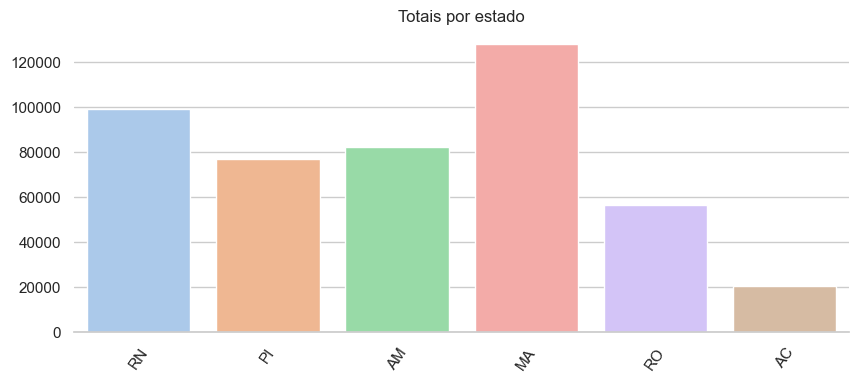

In [112]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x = 'sg_uf', data=estaticos_market, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=55) 
plt.ylabel('')
plt.xlabel('')
plt.title('Totais por estado')
sns.despine(left=True)
plt.show()

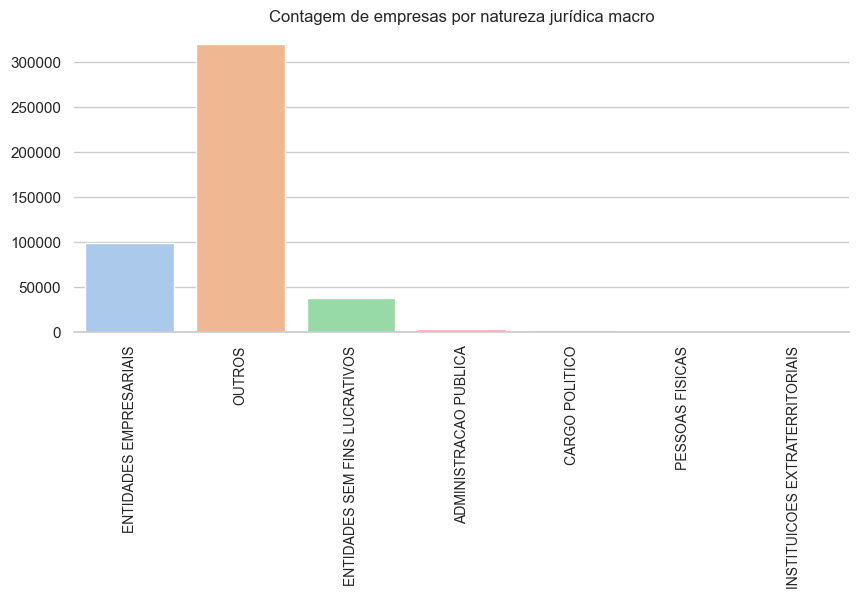

In [124]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x = 'natureza_juridica_macro', data=estaticos_market, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), size= 10, rotation=90) 
plt.ylabel('')
plt.xlabel('')
plt.title('Contagem de empresas por natureza jurídica macro')
sns.despine(left=True)
plt.show()

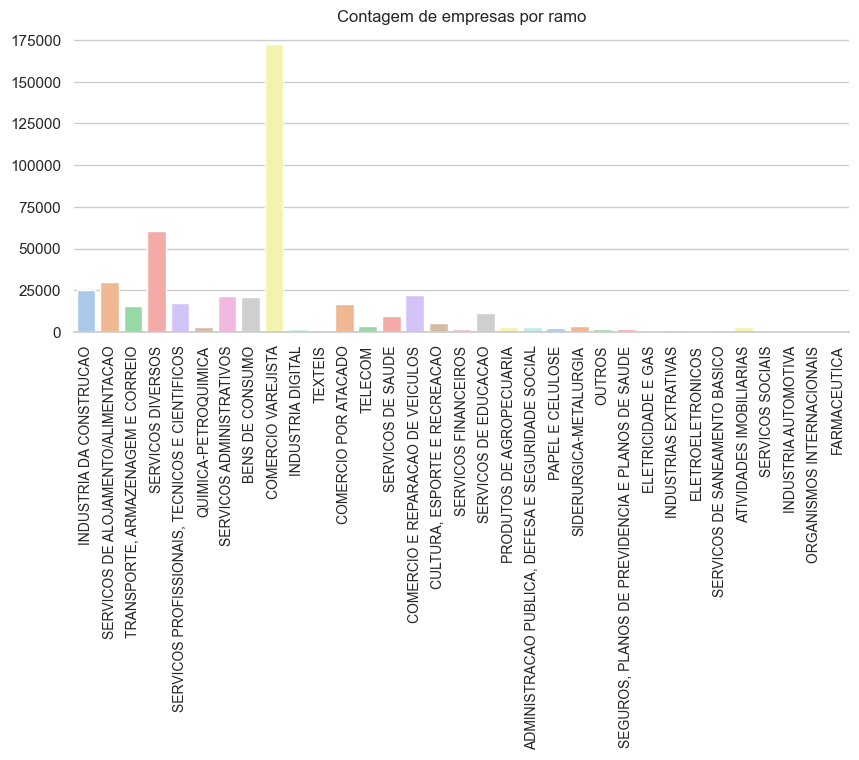

In [125]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x = 'de_ramo', data=estaticos_market, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), size= 10, rotation=90) 
plt.ylabel('')
plt.xlabel('')
plt.title('Contagem de empresas por ramo')
sns.despine(left=True)
plt.show()

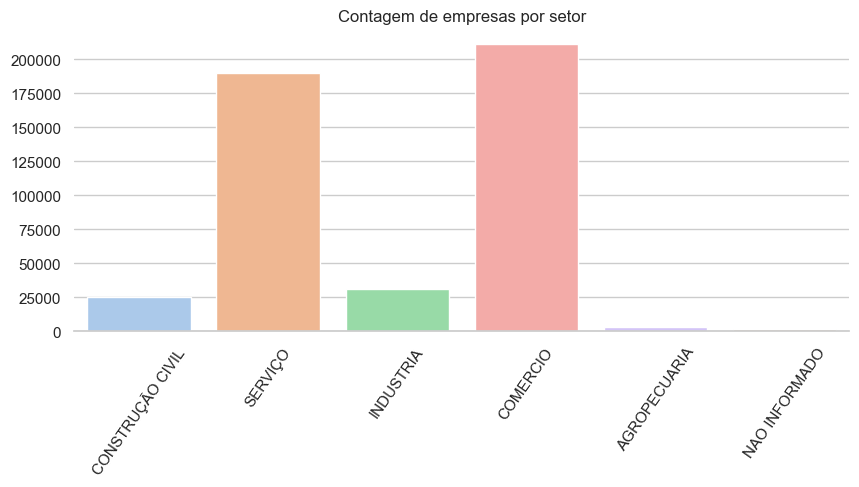

In [111]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x = 'setor', data=estaticos_market, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=55) 
plt.ylabel('')
plt.xlabel('')
plt.title('Contagem de empresas por setor')
sns.despine(left=True)
plt.show()

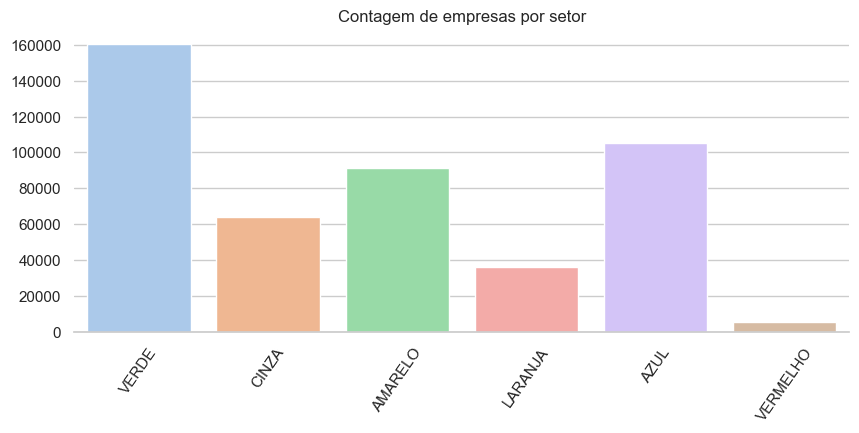

In [126]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x = 'de_saude_tributaria', data=estaticos_market, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=55) 
plt.ylabel('')
plt.xlabel('')
plt.title('Contagem de empresas por setor')
sns.despine(left=True)
plt.show()

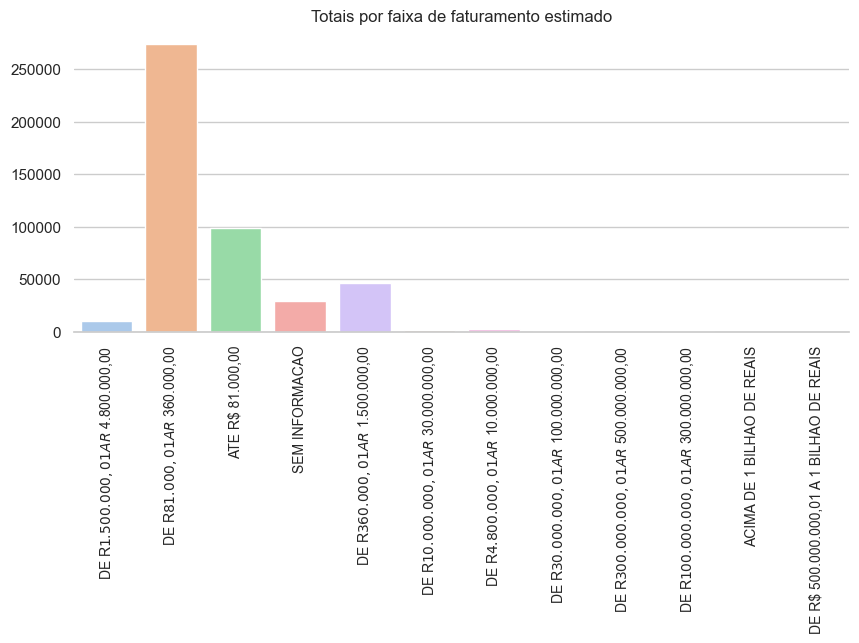

In [127]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x = 'de_faixa_faturamento_estimado', data=estaticos_market, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), size= 10, rotation=90) 
plt.ylabel('')
plt.xlabel('')
plt.title('Totais por faixa de faturamento estimado')
sns.despine(left=True)
plt.show()

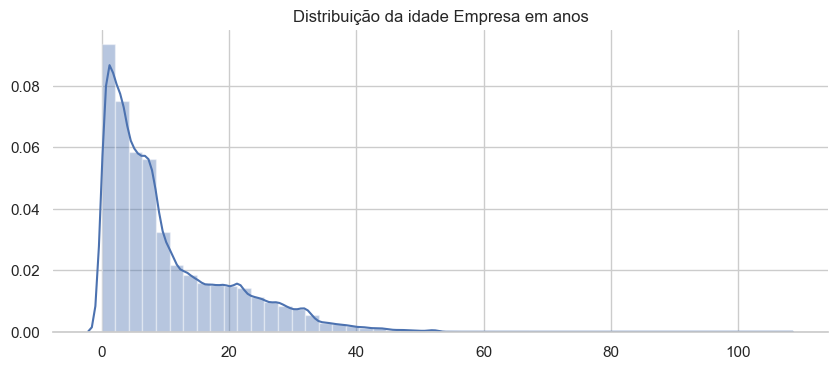

In [116]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.distplot(estaticos_market['idade_empresa_anos'])
plt.ylabel('')
plt.xlabel('')
plt.title('Distribuição da idade Empresa em anos')
sns.despine(left=True)
plt.show()

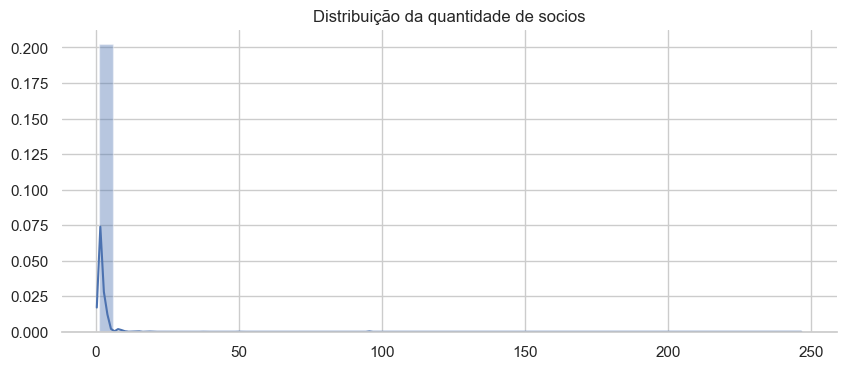

In [128]:
plt.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10,4))
ax = sns.distplot(estaticos_market['qt_socios'])
plt.ylabel('')
plt.xlabel('')
plt.title('Distribuição da quantidade de socios')
sns.despine(left=True)
plt.show()

## Pré-processamento dos dados